## Tải và Khám Phá Dữ Liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tải dữ liệu
data = pd.read_csv('TUANDROMD.csv')

# Khám phá dữ liệu
print(data.head())
print(data.describe())
print(data.isnull().sum())


   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
0   

## Tiền Xử Lý Dữ Liệu và Chia tập huấn luyện và tập kiểm tra

In [2]:
import pandas as pd
# Đọc dữ liệu
df = pd.read_csv('TUANDROMD.csv')
# Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()
# Hiển thị cột có giá trị thiếu
print("Các cột có giá trị thiếu:")
print(missing_values[missing_values > 0])
# Xử lý: thay thế các giá trị thiếu bằng giá trị trung bình
df.fillna(df.mean(), inplace=True)

Các cột có giá trị thiếu:
ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64


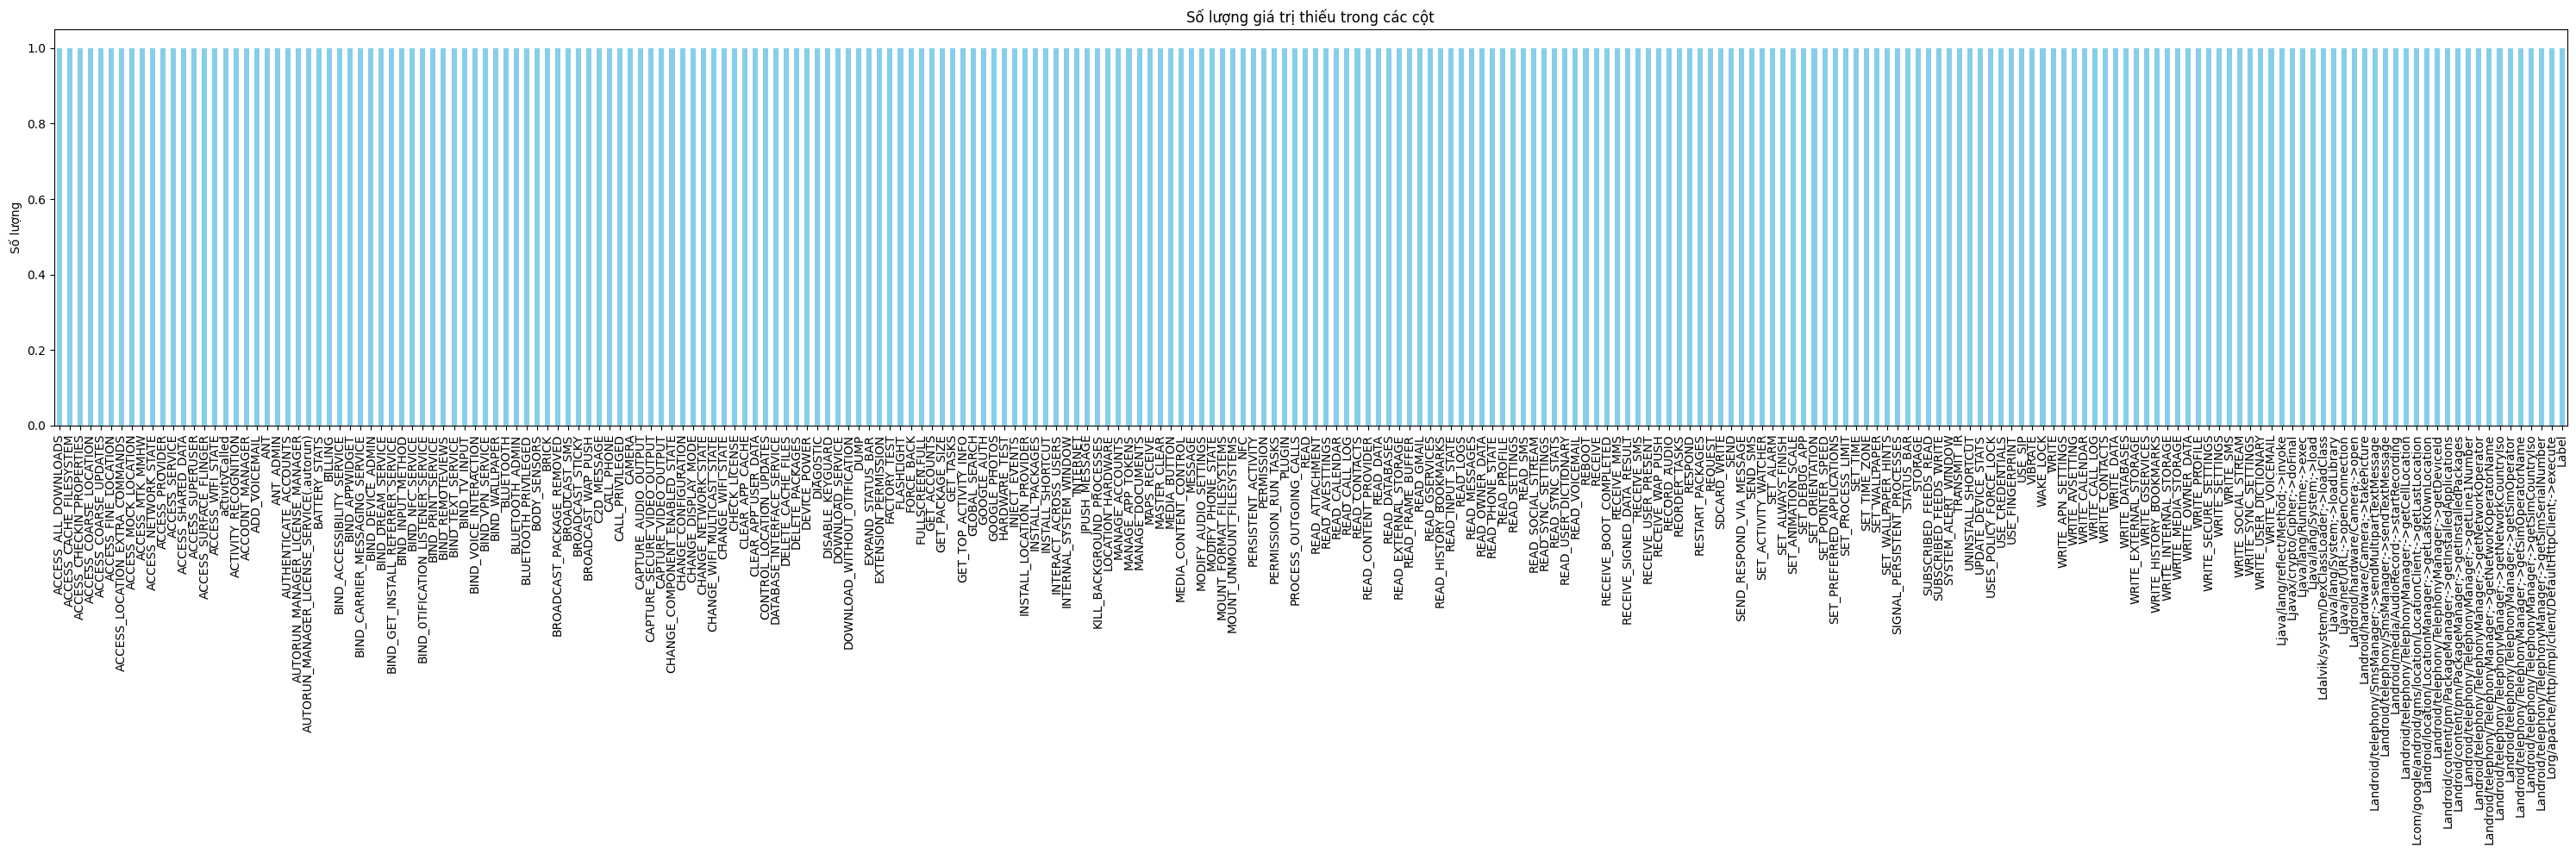

In [3]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cột cho những cột có giá trị thiếu
plt.figure(figsize=(30, 10))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Số lượng giá trị thiếu trong các cột')
plt.ylabel('Số lượng')
plt.xticks(rotation=90)  # Xoay nhãn cột để dễ đọc
plt.tight_layout()
plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Chuẩn hóa các giá trị về khoảng [0, 1]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Dữ liệu sau khi chuẩn hóa:")
print(df_scaled.head())


Dữ liệu sau khi chuẩn hóa:
   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATI

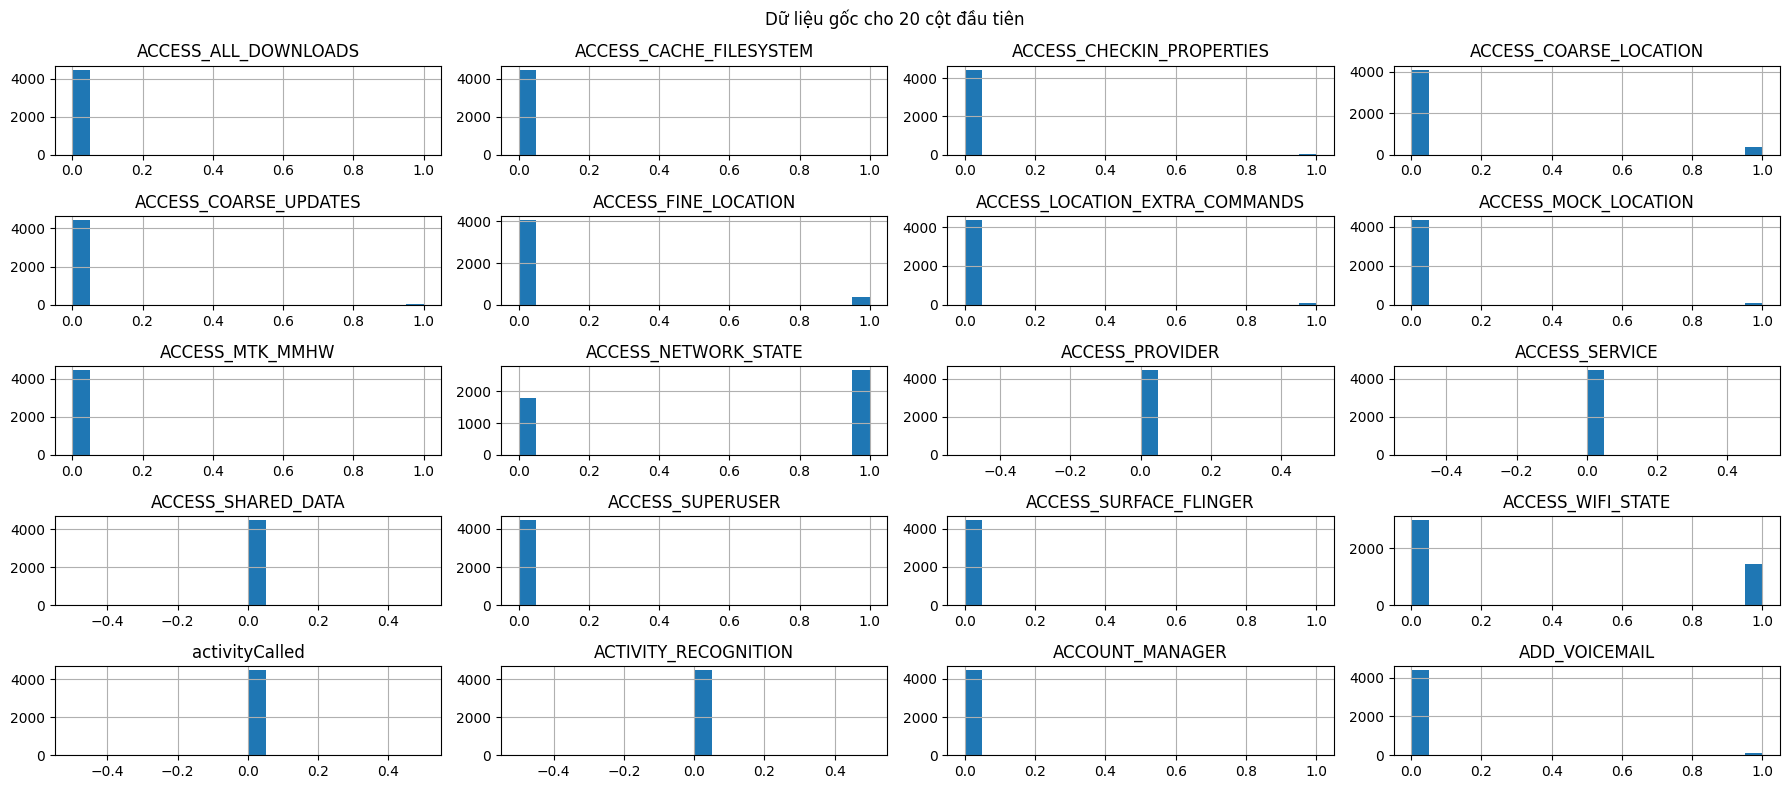

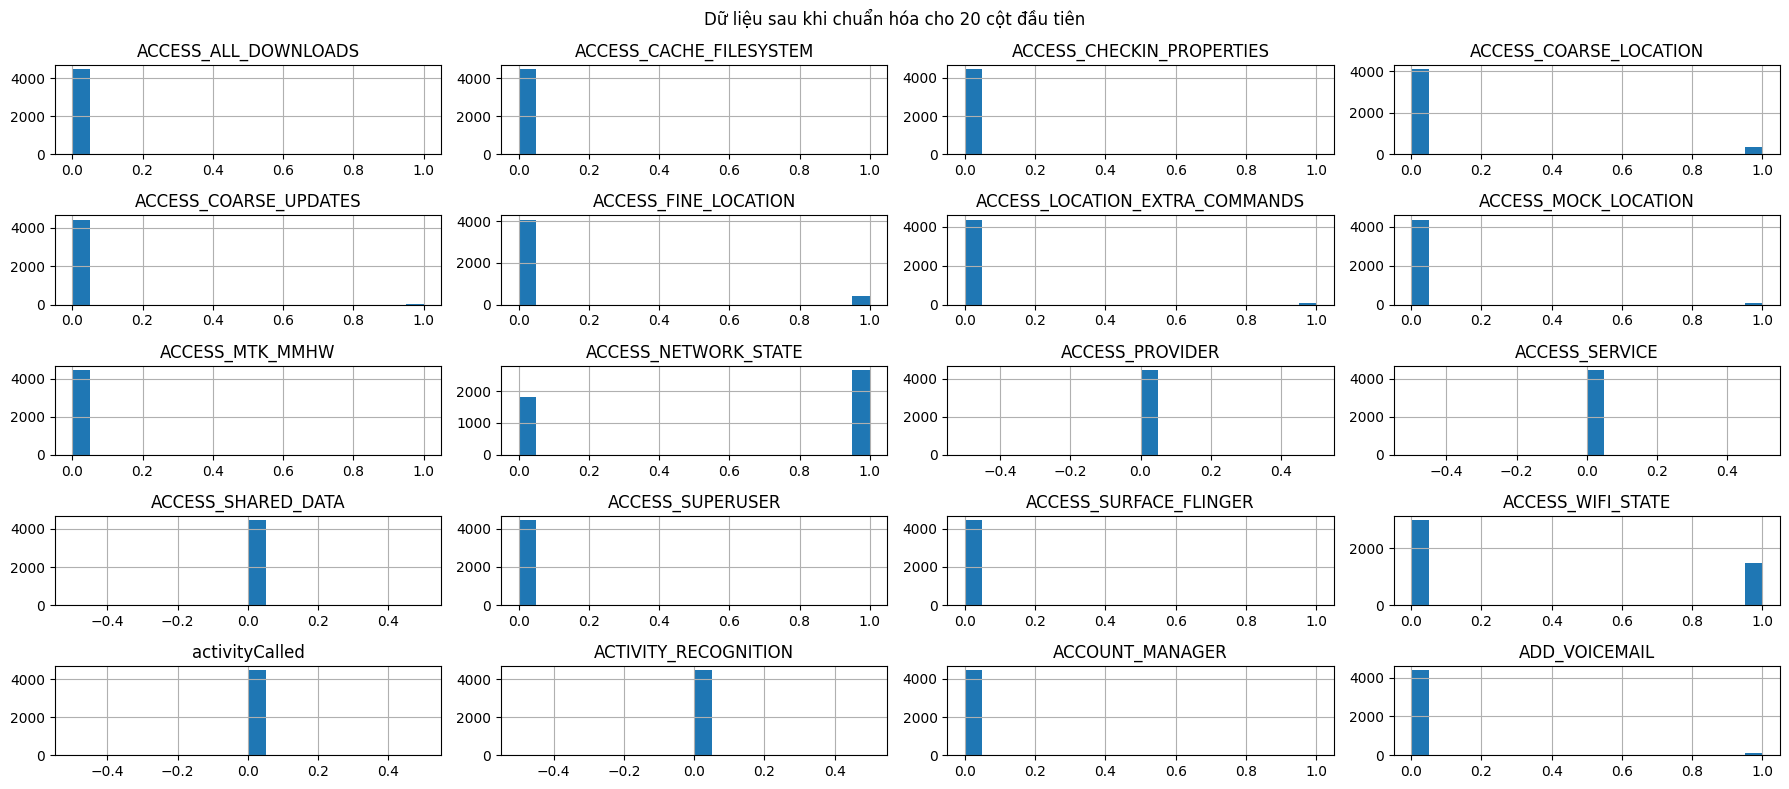

In [5]:
# Chọn ra 20 cột tiêu biểu để hiển thị
selected_columns = df.columns[:20]

# Biểu đồ dữ liệu gốc
df[selected_columns].hist(figsize=(18, 8), bins=20)
plt.suptitle('Dữ liệu gốc cho 20 cột đầu tiên')
plt.tight_layout()
plt.show()

# Biểu đồ dữ liệu sau khi chuẩn hóa
df_scaled[selected_columns].hist(figsize=(18, 8), bins=20)
plt.suptitle('Dữ liệu sau khi chuẩn hóa cho 20 cột đầu tiên')
plt.tight_layout()
plt.show()


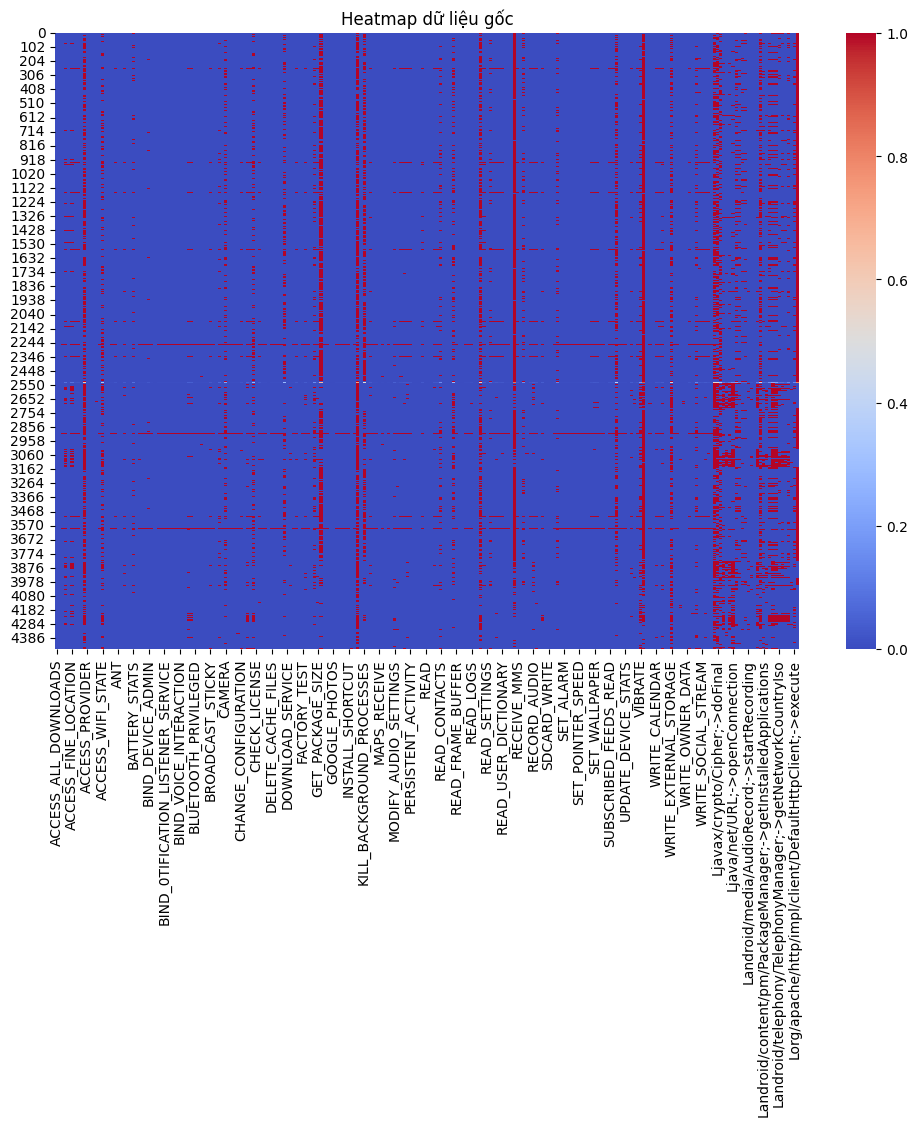

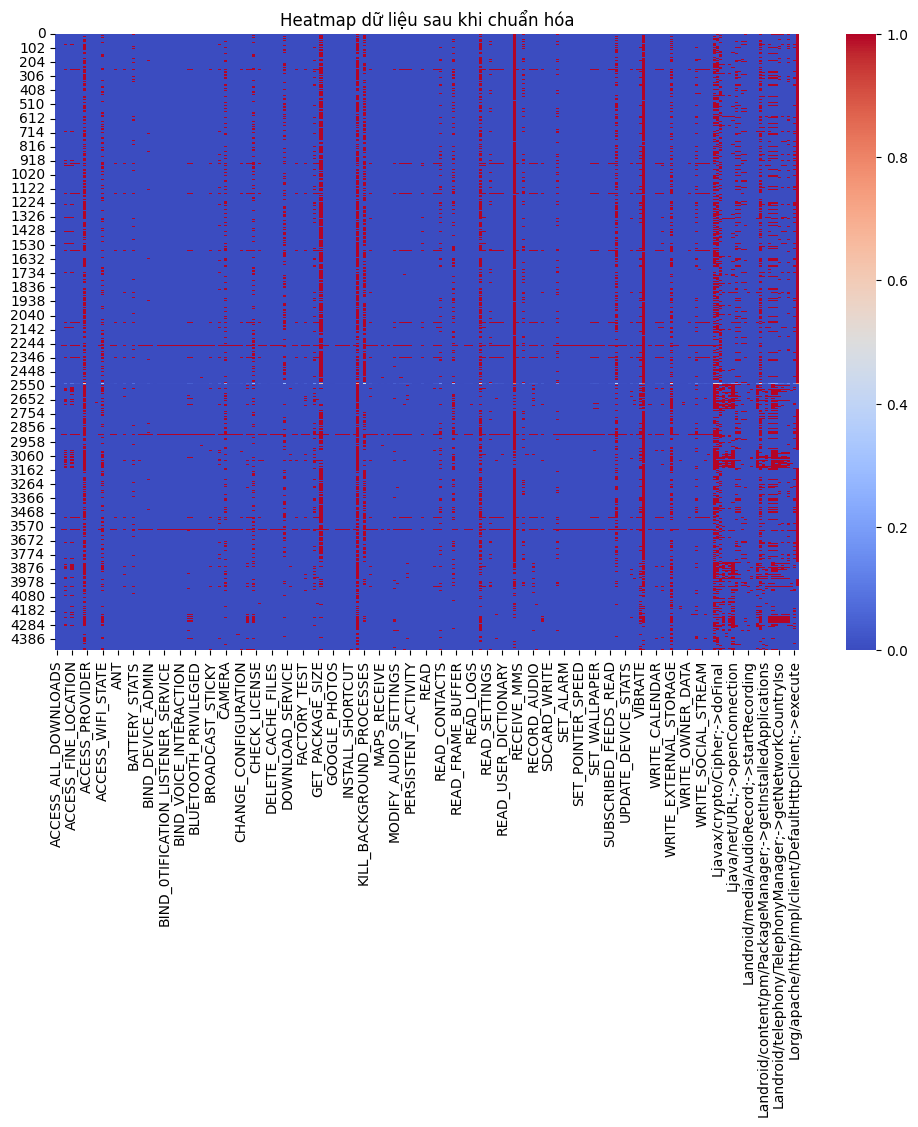

In [6]:
import seaborn as sns

selected_columns = df.columns[:]

# Biểu đồ heatmap dữ liệu gốc
plt.figure(figsize=(12, 8))
sns.heatmap(df[selected_columns], cmap='coolwarm')
plt.title('Heatmap dữ liệu gốc')
plt.show()

# Biểu đồ heatmap dữ liệu sau khi chuẩn hóa
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled[selected_columns], cmap='coolwarm')
plt.title('Heatmap dữ liệu sau khi chuẩn hóa')
plt.show()


In [7]:
# Chia dữ liệu thành X (các đặc điểm) và y (nhãn)
X = data.drop('Label', axis=1).values
y = data['Label'].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
np.random.seed(42)  # Để tái tạo kết quả
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]


## Xây Dựng Mô Hình Random Forest

### 4.1. Lớp DecisionTree

In [8]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=3):
        # Khởi tạo cây quyết định với độ sâu tối đa
        self.max_depth = max_depth
        self.tree = None  # Biến để lưu trữ cây

    def fit(self, X, y):
        """
        Huấn luyện mô hình trên dữ liệu X và nhãn y.
        X: Ma trận đặc trưng (features) chứa các thuộc tính của mẫu.
        y: Mảng nhãn (labels) tương ứng với các mẫu trong X.
        """
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        """
        Xây dựng cây quyết định dựa trên dữ liệu X và nhãn y.
        depth: Độ sâu hiện tại của cây.
        Trả về một nút của cây quyết định.
        """
        num_samples, num_features = X.shape
        # Kiểm tra các điều kiện dừng
        if num_samples == 0 or depth == self.max_depth or len(set(y)) == 1:
            return np.mean(y)  # Trả về giá trị trung bình nếu đạt điều kiện dừng

        # Tìm split tốt nhất
        best_feature, best_threshold = self._best_split(X, y)

        if best_feature is None:
            return np.mean(y)  # Trả về giá trị trung bình nếu không tìm thấy split tốt nhất

        # Chia dữ liệu thành hai nhánh
        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        # Gọi đệ quy để xây dựng cây con cho hai nhánh
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_tree, right_tree)  # Trả về thông tin về split tốt nhất

    def _best_split(self, X, y):
        """
        Tìm split tốt nhất trong dữ liệu.
        X: Ma trận đặc trưng (features).
        y: Mảng nhãn (labels).
        Trả về chỉ số thuộc tính tốt nhất và ngưỡng tương ứng để chia dữ liệu.
        """
        best_feature, best_threshold = None, None
        best_impurity = float('inf')  # Khởi tạo impurity tốt nhất

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])  # Các giá trị duy nhất của feature
            for threshold in thresholds:
                # Chia dữ liệu dựa trên threshold
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue  # Bỏ qua nếu một nhánh rỗng

                # Tính toán impurity cho split này
                impurity = self._gini_index(y[left_indices], y[right_indices])

                # Cập nhật split tốt nhất nếu tìm thấy impurity tốt hơn
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold  # Trả về feature và threshold tốt nhất

    def _gini_index(self, left_y, right_y):
        """
        Tính toán gini index cho một split.
        left_y: Mảng nhãn cho nhánh bên trái.
        right_y: Mảng nhãn cho nhánh bên phải.
        Trả về giá trị gini index có trọng số cho cả hai nhánh.
        """
        m = len(left_y) + len(right_y)  # Tổng số mẫu
        if m == 0:
            return 0
        # Tính toán gini index có trọng số cho cả hai nhánh
        return (len(left_y) / m) * self._gini(left_y) + (len(right_y) / m) * self._gini(right_y)

    def _gini(self, y):
        """
        Tính toán gini index cho một nhãn y.
        y: Mảng nhãn cần tính toán gini index.
        Trả về giá trị gini index cho nhãn y.
        """
        m = len(y)  # Số lượng mẫu
        if m == 0:
            return 0
        p1 = np.sum(y) / m  # Tỷ lệ của lớp 1
        p0 = 1 - p1  # Tỷ lệ của lớp 0
        # Công thức tính gini index
        return 1 - p1**2 - p0**2

    def predict(self, X):
        """
        Dự đoán nhãn cho các mẫu mới.
        X: Ma trận đặc trưng (features) của các mẫu cần dự đoán.
        Trả về mảng nhãn dự đoán tương ứng.
        """
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        """
        Dự đoán nhãn cho một mẫu đơn.
        sample: Mẫu đơn cần dự đoán.
        tree: Cây quyết định đã xây dựng.
        Trả về nhãn dự đoán cho mẫu.
        """
        if isinstance(tree, tuple):
            feature, threshold, left_tree, right_tree = tree  # Tách thông tin từ cây
            if sample[feature] < threshold:
                return self._predict_sample(sample, left_tree)  # Tiếp tục ở nhánh trái
            else:
                return self._predict_sample(sample, right_tree)  # Tiếp tục ở nhánh phải
        return 1 if tree > 0.5 else 0  # Dự đoán nhãn 1 nếu giá trị lớn hơn 0.5, ngược lại là 0


### 4.2. Lớp RandomForest

In [9]:
import numpy as np

class RandomForest:
    def __init__(self, n_trees=100, max_depth=5):
        """
        Khởi tạo mô hình rừng ngẫu nhiên với số lượng cây và độ sâu tối đa.
        n_trees: Số lượng cây trong rừng.
        max_depth: Độ sâu tối đa cho mỗi cây.
        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []  # Danh sách để lưu trữ các cây quyết định

    def fit(self, X, y):
        """
        Huấn luyện mô hình rừng ngẫu nhiên trên dữ liệu X và nhãn y.
        X: Ma trận đặc trưng (features) chứa các thuộc tính của mẫu.
        y: Mảng nhãn (labels) tương ứng với các mẫu trong X.
        """
        num_samples = X.shape[0]  # Số lượng mẫu trong tập dữ liệu
        for _ in range(self.n_trees):
            # Chọn ngẫu nhiên mẫu với hoàn lại (bootstrap sampling)
            indices = np.random.choice(num_samples, size=num_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]  # Tạo mẫu ngẫu nhiên
            tree = DecisionTree(max_depth=self.max_depth)  # Tạo cây quyết định mới
            tree.fit(X_sample, y_sample)  # Huấn luyện cây trên mẫu ngẫu nhiên
            self.trees.append(tree)  # Thêm cây vào danh sách

    def predict(self, X):
        """
        Dự đoán nhãn cho các mẫu mới.
        X: Ma trận đặc trưng (features) của các mẫu cần dự đoán.
        Trả về mảng nhãn dự đoán tương ứng.
        """
        tree_preds = np.array([tree.predict(X) for tree in self.trees])  # Dự đoán từ tất cả các cây
        # Trả về nhãn với số lượng lớn nhất từ các dự đoán
        return np.array([np.bincount(tree_pred).argmax() for tree_pred in tree_preds.T])


## Huấn Luyện Mô Hình

In [10]:
# Huấn luyện mô hình
rf_model = RandomForest(n_trees=100, max_depth=5)  # Tăng số lượng cây và chiều sâu tối đa
rf_model.fit(X_train, y_train)


## Dự Đoán và Đánh Giá Độ Chính Xác

In [11]:
# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Tính toán độ chính xác
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 98.43%


## Phân Tích Kết Quả

### Biểu đồ so sánh giữa nhãn thực và nhãn dự đoán

### Ma trận nhầm lẫn

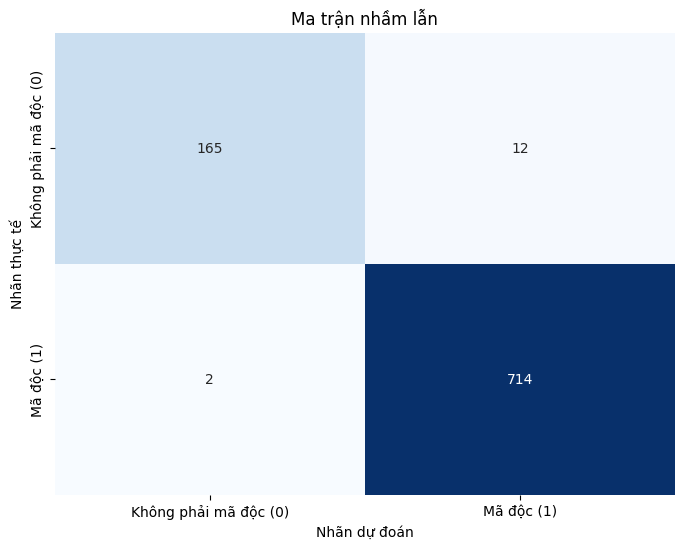

In [12]:
from sklearn.metrics import confusion_matrix

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Không phải mã độc (0)', 'Mã độc (1)'],
            yticklabels=['Không phải mã độc (0)', 'Mã độc (1)'])
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.show()


### Biểu đồ số lượng dự đoán đúng và sai

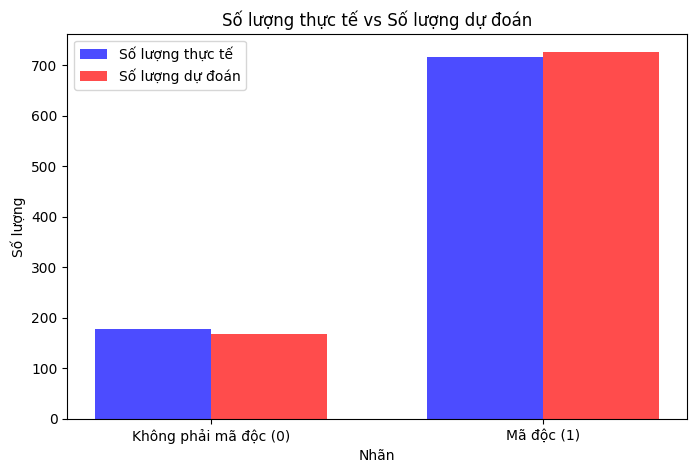

In [13]:
# Tính số lượng dự đoán đúng và sai
true_counts = cm.sum(axis=1)  # Số lượng mẫu thực cho mỗi lớp
predicted_counts = cm.sum(axis=0)  # Số lượng mẫu dự đoán cho mỗi lớp

# Vẽ biểu đồ cột
labels = ['Không phải mã độc (0)', 'Mã độc (1)']
x = np.arange(len(labels))  # Tạo vị trí cho các nhãn

plt.figure(figsize=(8, 5))
bar_width = 0.35

# Tạo các cột cho nhãn thực và nhãn dự đoán
plt.bar(x - bar_width/2, true_counts, bar_width, label='Số lượng thực tế', alpha=0.7, color='blue')
plt.bar(x + bar_width/2, predicted_counts, bar_width, label='Số lượng dự đoán', alpha=0.7, color='red')

plt.title('Số lượng thực tế vs Số lượng dự đoán')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.xticks(x, labels)  # Nhãn cho trục x
plt.legend()
plt.show()
